In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
!pip install -q numpy pandas matplotlib scikit-learn imbalanced-learn joblib


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import joblib


In [9]:
df = pd.read_csv('creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [11]:
df['Class'].value_counts()
df['Class'].value_counts(normalize=True)


,proportion
Class,
0.0,0.99679
1.0,0.00321


In [13]:
X = df.drop('Class', axis=1)
y = df['Class']



In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


ValueError: Input y contains NaN.

In [17]:
df['Class'].isna().sum()


np.int64(1)

In [19]:
df = df.dropna(subset=['Class'])


In [21]:
df['Class'].isna().sum()


np.int64(0)

In [24]:
X = df.drop('Class', axis=1)
y = df['Class']


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [29]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6336
         1.0       0.56      0.50      0.53        20

    accuracy                           1.00      6356
   macro avg       0.78      0.75      0.76      6356
weighted avg       1.00      1.00      1.00      6356



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [33]:
y_pred_rf = rf.predict(X_test)

print("Random Forest Report")
print(classification_report(y_test, y_pred_rf))


Random Forest Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6336
         1.0       0.85      0.85      0.85        20

    accuracy                           1.00      6356
   macro avg       0.92      0.92      0.92      6356
weighted avg       1.00      1.00      1.00      6356



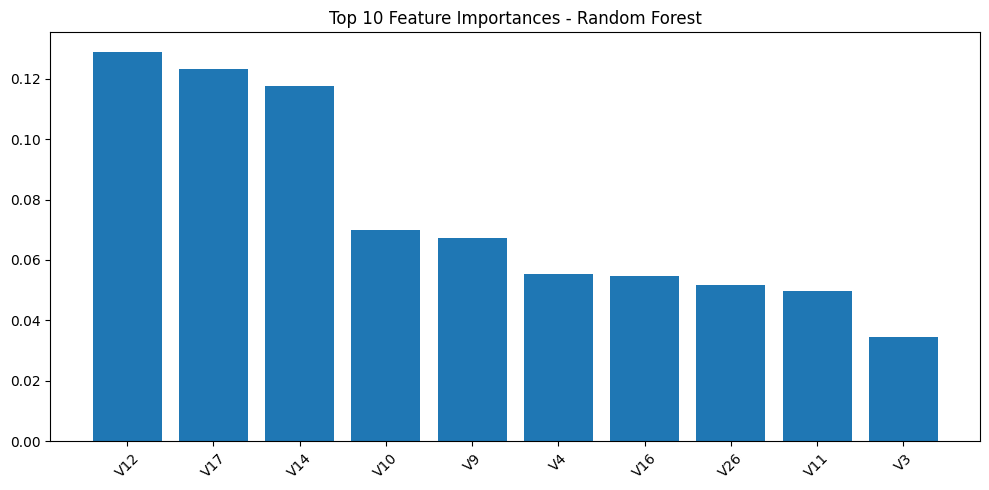

In [35]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:10]

plt.figure(figsize=(10,5))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), X.columns[indices], rotation=45)
plt.title("Top 10 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()


In [37]:
joblib.dump(rf, '/content/drive/MyDrive/credit_card_fraud_rf.pkl')


['/content/drive/MyDrive/credit_card_fraud_rf.pkl']

In [38]:
from google.colab import files
files.download('/content/drive/MyDrive/credit_card_fraud_rf.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>